# 📌 Prediksi Penggunaan Listrik dengan Linear Regression, Polynomial Regression, Ridge & Lasso Regression, Decision Tree Regression dan SVR

Pada tugas ini, kita akan menggunakan **Electricity Cost Prediction Dataset**. Dataset bisa diakses melalui link berikut:\
🔗 https://www.kaggle.com/datasets/shalmamuji/electricity-cost-prediction-dataset

Tujuan utama dari tugas ini adalah membangun model Linear Regression, Polynomial Regression, Ridge & Lasso Regression, Decision Tree Regression dan SVR untuk memprediksi penggunaan listrik.

Langkah-langkah yang harus dilakukan antara lain:

1. Persiapan Dataset & Eksplorasi Awal
- Memuat dataset, melihat struktur data, tipe fitur (numerik atau kategorikal), dan distribusi label.

2. Preprocessing 
- Memproses data agar siap untuk digunakan dalam model, termasuk menangani missing value, encoding fitur kategorikal, dan normalisasi/standardisasi jika diperlukan.

3. Eksperimen Model 

Untuk Linear Regression:
- Bangun model Linear Regression.
- Eksperimen dengan penggunaan intercept.

Untuk Polynomial Regression:
- Lakukan transformasi fitur polinomial.
- Bangun model Linear Regression.
- Eksperimen dengan penggunaan intercept dan hyperparameter transformasi fitur polinomial.

Untuk Ridge & Lasso Regression:
- Bangun model Ridge dan Lasso Regression.
- Eksperimen dengan nilai alpha yang berbeda-beda.

Untuk Decision Tree Regression:
- Bangun model Decision Tree Regression.
- Eksperimen dengan criterion dan hyperparameter yang berbeda-beda.

Untuk SVR:
- Bangun model SVR.
- Eksperimen dengan kernel (linear, rbf, poly), parameter regularisasi C, dan parameter kernel lain seperti gamma.

4. Evaluasi Model
- Hitung metrik evaluasi seperti MAE, MSE, RMSE dan R2 dan visualisasikan data serta prediksi model.

5. Analisis & Kesimpulan
- Bandingkan performa antar eksperimen parameter.
- Tentukan kombinasi parameter terbaik yang menghasilkan performa optimal.
- Identifikasi fitur yang paling berpengaruh dalam memprediksi penggunaan listrik.
- Menarik kesimpulan mengenai kemampuan Linear Regression, Polynomial Regression, Ridge & Lasso Regression, Decision Tree Regression dan SVR dalam menangani dataset ini, termasuk kelebihan dan keterbatasannya.

# 1. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# 2. Load Dataset

In [2]:
df = pd.read_csv('electricity_cost_dataset.csv')

# 3. Eksplorasi Data

In [3]:
df.head()

site area structure type  water consumption  recycling rate  \
0       1360      Mixed-use             2519.0              69   
1       4272      Mixed-use             2324.0              50   
2       3592      Mixed-use             2701.0              20   
3        966    Residential             1000.0              13   
4       4926    Residential             5990.0              23   

   utilisation rate  air qality index  issue reolution time  resident count  \
0                52               188                     1              72   
1                76               165                    65             261   
2                94               198                    39             117   
3                60                74                     3              35   
4                65                32                    57             185   

   electricity cost  
0            1420.0  
1            3298.0  
2            3115.0  
3            1575.0  
4            4301.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [5]:
df.describe(include='all')

site area structure type  water consumption  recycling rate  \
count   10000.000000          10000       10000.000000    10000.000000   
unique           NaN              4                NaN             NaN   
top              NaN    Residential                NaN             NaN   
freq             NaN           3939                NaN             NaN   
mean     2757.775100            NaN        3494.057100       49.598000   
std      1293.059959            NaN        2076.181117       23.430141   
min       501.000000            NaN        1000.000000       10.000000   
25%      1624.000000            NaN        1779.000000       29.750000   
50%      2773.500000            NaN        3047.500000       49.000000   
75%      3874.000000            NaN        4811.000000       70.000000   
max      5000.000000            NaN       10894.000000       90.000000   

        utilisation rate  air qality index  issue reolution time  \
count       10000.000000      10000.000000          10000.000000   
unique               NaN               NaN                   NaN   
top                  NaN               NaN                   NaN   
freq                 NaN               NaN                   NaN   
mean           64.842200         99.468600             36.402600   
std            20.432965         58.014526             20.623905   
min            30.000000          0.000000              1.000000   
25%            47.000000         49.000000             19.000000   
50%            65.000000        100.000000             36.000000   
75%            83.000000        150.000000             54.000000   
max           100.000000        200.000000             72.000000   

        resident count  electricity cost  
count     10000.000000      10000.000000  
unique             NaN               NaN  
top                NaN               NaN  
freq               NaN               NaN  
mean         85.573100       2837.845000  
std         107.876179       1106.997441  
min           0.000000        500.000000  
25%           0.000000       1954.000000  
50%          39.000000       2760.000000  
75%         142.000000       3632.000000  
max         489.000000       6446.000000

In [6]:
df.isnull().sum()

site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64

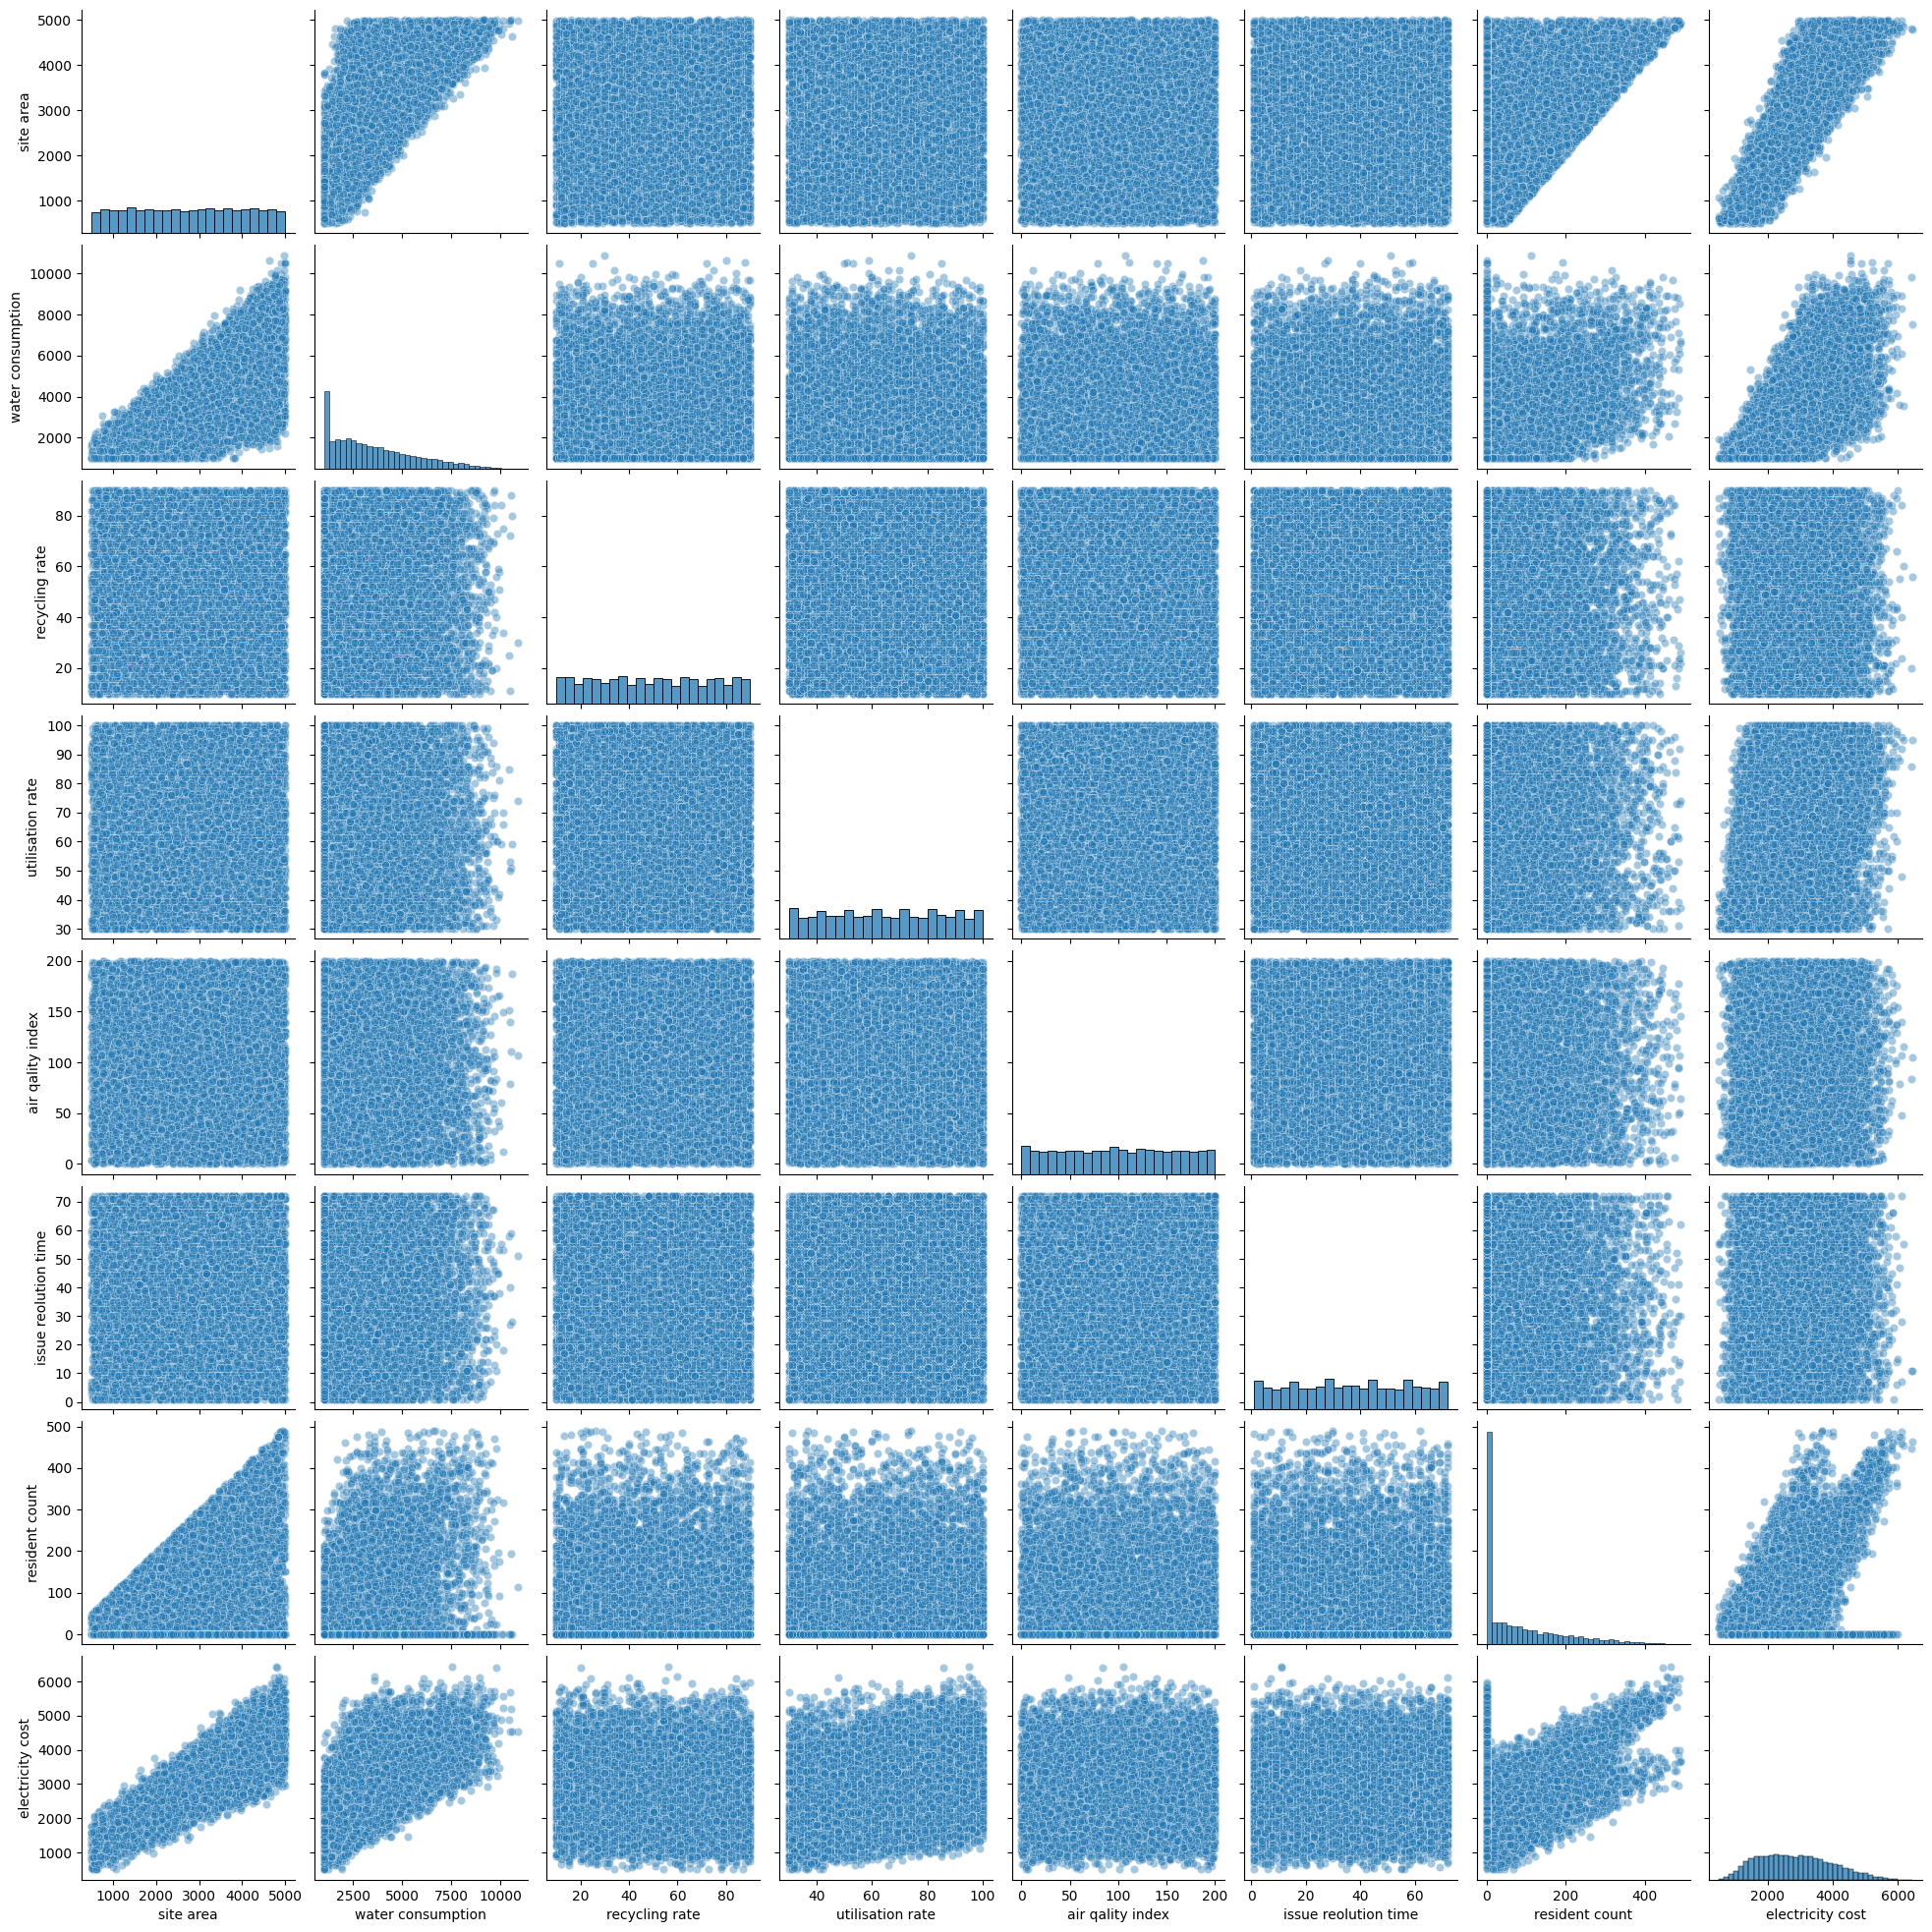

In [7]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.4})
plt.show()

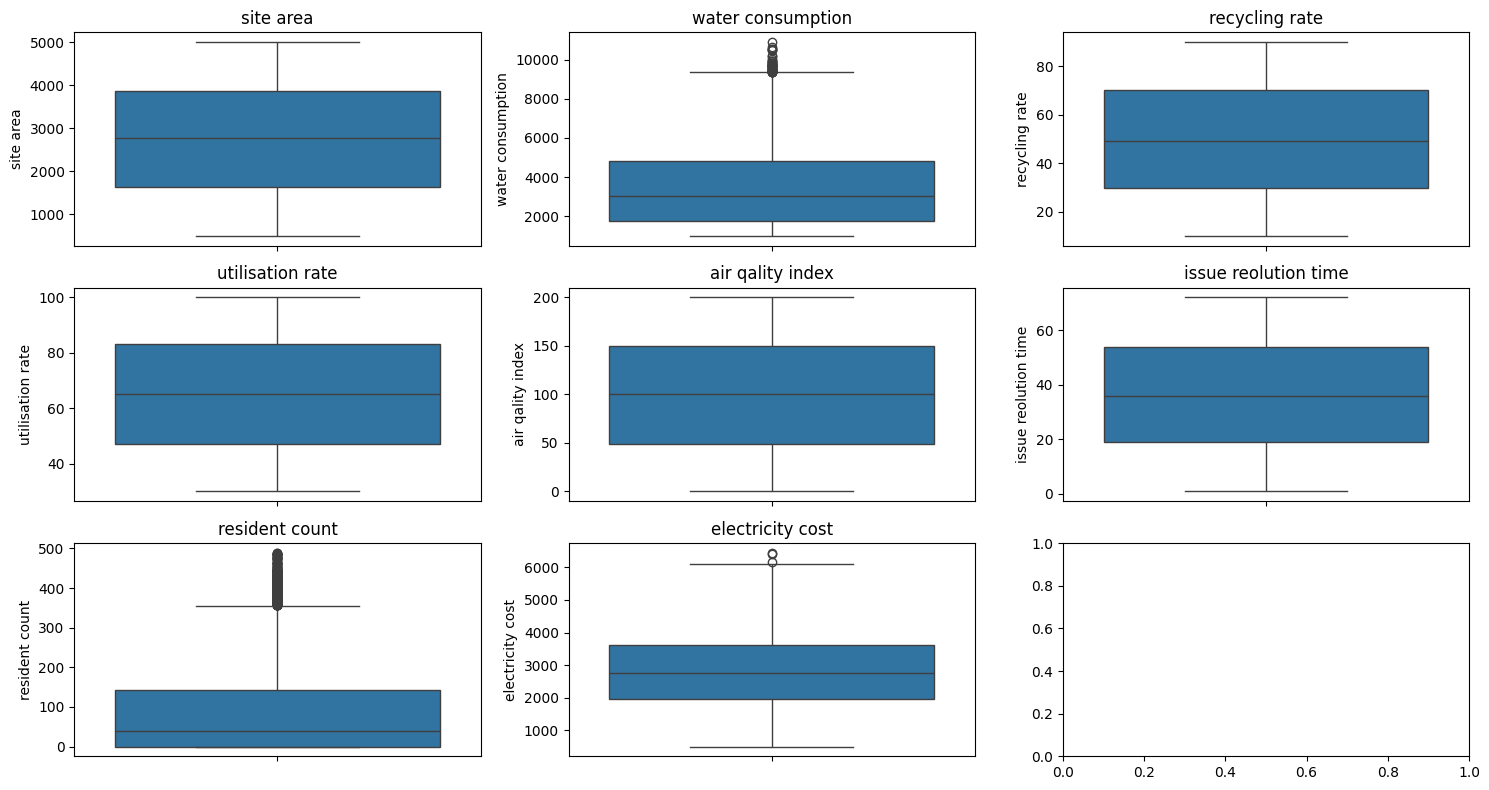

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(np.number)):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

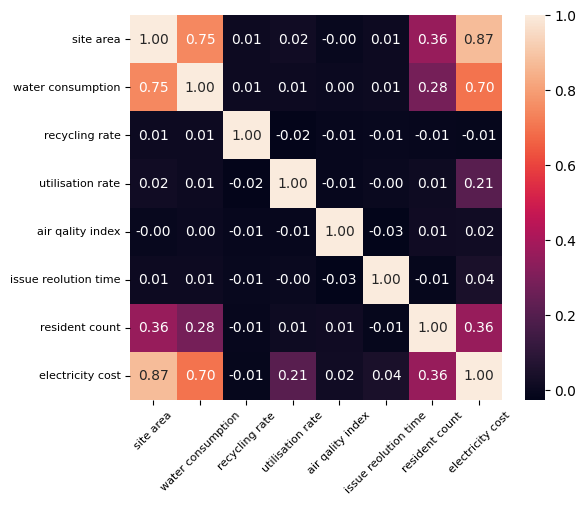

In [9]:
plt.figure(figsize=(6,5))
korelasi = df.select_dtypes(np.number).corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.2f')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# 4. Data Cleaning & Preprocessing

In [10]:
df = pd.get_dummies(data=df, drop_first=True)

# 5. Feature Engineering & Selection

# 6. Training

In [11]:
x = df.drop(columns='electricity cost', axis=1)
y = df['electricity cost']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### `linear regression`

In [12]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

y_pred_linreg = model.predict(X_test)

### `polinomial regression`

In [13]:
degrees = [2, 3, 4]
poly_results = {}

for d in degrees:
    poly = PolynomialFeatures(
        degree=d,
        interaction_only=False,
        include_bias=False
    )
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model_poly = LinearRegression(fit_intercept=True)
    model_poly.fit(X_train_poly, y_train)
    y_pred_poly = model_poly.predict(X_test_poly)

    poly_results[d] = y_pred_poly

### `ridge regression`

In [14]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
ridge_result = {}

for i in alphas:
    ridge_model = Ridge(alpha=i) 
    ridge_model.fit(X_train, y_train)
    ridge_pred = ridge_model.predict(X_test)

    ridge_result[i] = ridge_pred

### `lasso regression`

In [15]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
lasso_result = {}

for i in alphas:
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_train, y_train)
    lasso_pred = lasso_model.predict(X_test)

    lasso_result[i] = lasso_pred

### `decision tree regression`

In [16]:
criteria = ['squared_error', 'friedman_mse', 'absolute_error']
max_depths = [2, 4, 6]
min_samples_leafs = [1, 2, 4]

dt_results = {}

for crit in criteria:
    for depth in max_depths:
        for leaf in min_samples_leafs:
            dt_model = DecisionTreeRegressor(
                criterion=crit,
                max_depth=depth,
                min_samples_leaf=leaf,
                random_state=42
            )
            dt_model.fit(X_train, y_train)
            y_pred = dt_model.predict(X_test)
            dt_results[(crit, depth, leaf)] = y_pred

### `SVR`

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kernels = ['linear', 'rbf', 'poly']
Cs = [100, 1000]
gammas = [0.1]

svr_results = {}
for kernel in kernels:
    for C_val in Cs:
        for gamma_val in gammas:
            svr_model = SVR(
                kernel=kernel,
                C=C_val,
                gamma=gamma_val,
            )
            svr_model.fit(X_train_scaled, y_train)
            y_pred = svr_model.predict(X_test_scaled)
            
            svr_results[(kernel, C_val, gamma_val)] = y_pred

# 7. Evaluation

### `linear regression`

In [18]:
mae = mean_absolute_error(y_test, y_pred_linreg)
mse = mean_squared_error(y_test, y_pred_linreg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linreg)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 245.6519940277255
MSE : 97381.90152866665
RMSE: 312.06073371808037
R²  : 0.921937922121036


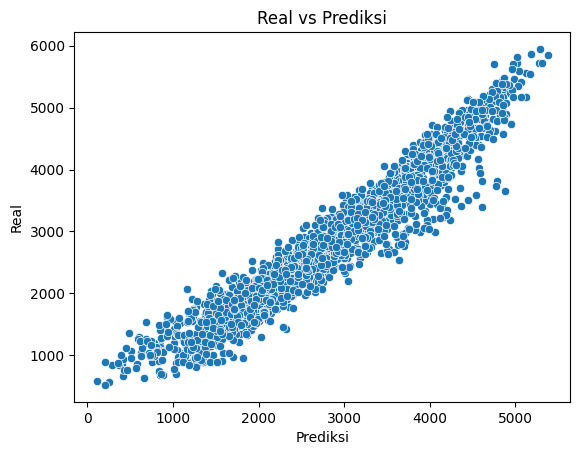

In [19]:
sns.scatterplot(x=y_pred_linreg, y=y_test)
plt.title('Real vs Prediksi')
plt.xlabel('Prediksi')
plt.ylabel('Real')
plt.show()

### `polinomial regression`

In [20]:
mae = mean_absolute_error(y_test, poly_results[2])
mse = mean_squared_error(y_test, poly_results[2])
rmse = np.sqrt(mse)
r2 = r2_score(y_test, poly_results[2])

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 158.9794216839852
MSE : 39208.76179759797
RMSE: 198.0120243762938
R²  : 0.9685699563375146


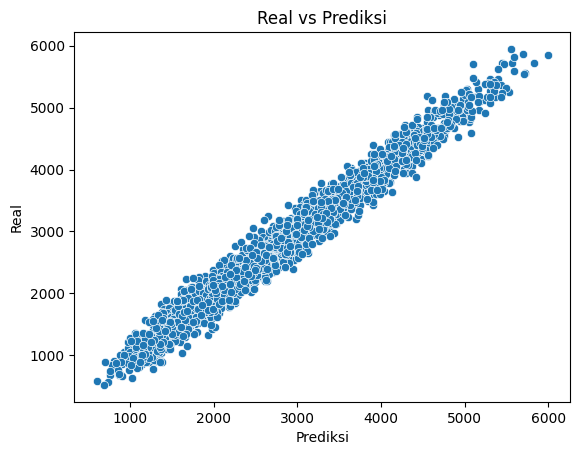

In [21]:
sns.scatterplot(x=poly_results[2], y=y_test)
plt.title('Real vs Prediksi')
plt.xlabel('Prediksi')
plt.ylabel('Real')
plt.show()

### `ridge regression`

In [22]:
mae = mean_absolute_error(y_test, ridge_result[10])
mse = mean_squared_error(y_test, ridge_result[10])
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ridge_result[10])

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 245.5331628755058
MSE : 97316.58545202801
RMSE: 311.95606333589353
R²  : 0.9219902799881682


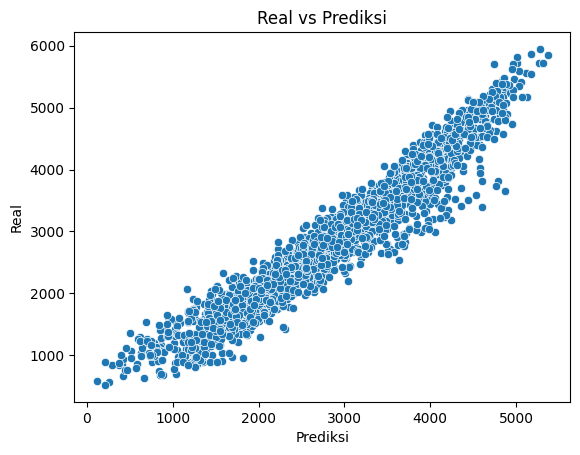

In [23]:
sns.scatterplot(x=ridge_result[10], y=y_test)
plt.title('Real vs Prediksi')
plt.xlabel('Prediksi')
plt.ylabel('Real')
plt.show()

### `lasso regression`

In [24]:
mae = mean_absolute_error(y_test, lasso_result[1])
mse = mean_squared_error(y_test, lasso_result[1])
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_result[1])

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 245.5694246789381
MSE : 97271.56383375288
RMSE: 311.8838947970108
R²  : 0.9220263696620897


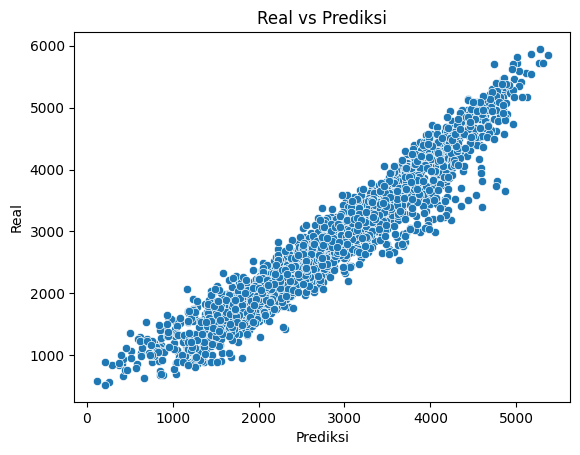

In [25]:
sns.scatterplot(x=lasso_result[1], y=y_test)
plt.title('Real vs Prediksi')
plt.xlabel('Prediksi')
plt.ylabel('Real')
plt.show()

### `decision tree regression`

In [26]:
mae = mean_absolute_error(y_test, dt_results[('absolute_error', 6, 1)])
mse = mean_squared_error(y_test, dt_results[('absolute_error', 6, 1)])
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_results[('absolute_error', 6, 1)])

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 260.50375
MSE : 108570.462875
RMSE: 329.5003230271558
R²  : 0.9129690856795548


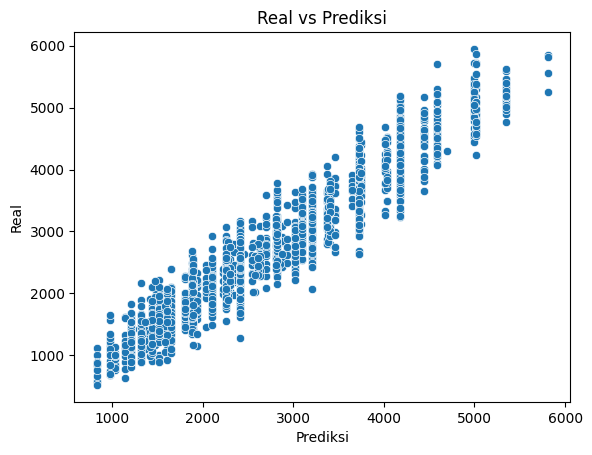

In [27]:
sns.scatterplot(x=dt_results[('absolute_error', 6, 1)], y=y_test)
plt.title('Real vs Prediksi')
plt.xlabel('Prediksi')
plt.ylabel('Real')
plt.show()

### `SVR`

In [28]:
mae = mean_absolute_error(y_test, svr_results[('poly', 1000, 0.1)])
mse = mean_squared_error(y_test, svr_results[('poly', 1000, 0.1)])
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_results[('poly', 1000, 0.1)])

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 162.41757137376734
MSE : 40785.921643483955
RMSE: 201.95524663519873
R²  : 0.9673056929293814


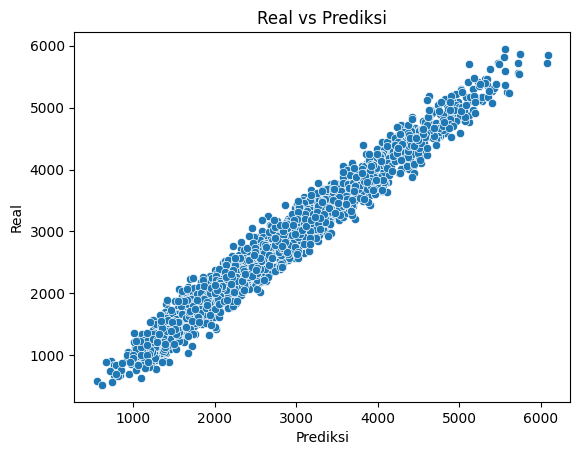

In [29]:
sns.scatterplot(x= svr_results[('poly', 1000, 0.1)], y=y_test)
plt.title('Real vs Prediksi')
plt.xlabel('Prediksi')
plt.ylabel('Real')
plt.show()

# 8. Kesimpulan

Berdasarkan dataset dan beberapa model di atas, dapat kita lihat bahwa __site area__ adalah fitur yang paling berpengaruh dalam memprediksi penggunaan listrik dengan korelasi 0.87. 

Dari 6 model di atas, model yang paling baik dalam memprediksi penggunaan listrik adalah __Polynomial Regression__ dengan hyperparameter: [degree = 2, fit_intercept=True] dan hasil Mean Absolute Error = 167, R2 = 0.964.